In [34]:
import networkx as nx
import pandas as pd

# Cargar el dataset de rutas (descargado de OpenFlights)
routes_df = pd.read_csv('routes.dat', header=None)

# Mostrar las primeras filas del dataset
print(routes_df.head())

# Extraer columnas de interés (nodos origen y destino)
edges = routes_df[[2, 4]].values  # Columnas con los ID de los aeropuertos de origen y destino

# Crear un grafo dirigido
G = nx.DiGraph()

# Añadir aristas al grafo
G.add_edges_from(edges)

# Obtener el número de nodos y aristas
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# Mostrar la información
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")



    0    1    2     3    4     5    6  7    8
0  2B  410  AER  2965  KZN  2990  NaN  0  CR2
1  2B  410  ASF  2966  KZN  2990  NaN  0  CR2
2  2B  410  ASF  2966  MRV  2962  NaN  0  CR2
3  2B  410  CEK  2968  KZN  2990  NaN  0  CR2
4  2B  410  CEK  2968  OVB  4078  NaN  0  CR2
Number of nodes: 3425
Number of edges: 37595


In [35]:
# print a list of the first 10 nodes so we can see what they look like
print(list(G.nodes(data=True))[:10])

[('AER', {}), ('KZN', {}), ('ASF', {}), ('MRV', {}), ('CEK', {}), ('OVB', {}), ('DME', {}), ('NBC', {}), ('TGK', {}), ('UUA', {})]


In [36]:
# print the first 10 edges so we can see what they look like
print(list(G.edges(data=True))[:10])

[('AER', 'KZN', {}), ('AER', 'DYU', {}), ('AER', 'KIV', {}), ('AER', 'MSQ', {}), ('AER', 'TAS', {}), ('AER', 'TZX', {}), ('AER', 'EVN', {}), ('AER', 'KRR', {}), ('AER', 'DME', {}), ('AER', 'IST', {})]


In [37]:
# reduce the graph to south america only
south_america = [
    'Argentina',
    'Brazil',
    'Chile',
    'Ecuador',
    'Paraguay',
    'Colombia',
    'Bolivia',
    'Suriname',
    'French Guiana',
    'Peru',
    'Uruguay',
    'Venezuela',
    'Guyana'
]


# use airport.dat to get the country of each airport
airports_df = pd.read_csv('airports.dat', header=None)

# print(airports_df)

# get the country of each airport
airports = airports_df[[3, 4]].values

print(airports)

# create a dictionary with the country of each airport
countries = {}
for airport in airports:
    # print("dgsdfgdfs")
    countries[airport[1]] = airport[0]

print(countries)

# create a new graph with only the airports in south america
G_sa = nx.DiGraph()

# add the edges to the new graph
for edge in G.edges():
    # print("depu>",edge)
    # print("deur",countries.get(edge[0]))
    # if countries.get(edge[0]) in south_america:
    if countries.get(edge[0]) == "Peru":
        # print("i")
        if countries.get(edge[1]) in south_america:
            G_sa.add_edge(edge[0], edge[1])

# get the number of nodes and edges
num_nodes_sa = G_sa.number_of_nodes()
num_edges_sa = G_sa.number_of_edges()

# show the information
print(f"Number of nodes in South America: {num_nodes_sa}")
print(f"Number of edges in South America: {num_edges_sa}")


[['Papua New Guinea' 'GKA']
 ['Papua New Guinea' 'MAG']
 ['Papua New Guinea' 'HGU']
 ...
 ['Russia' '\\N']
 ['Chile' 'CPO']
 ['Ukraine' '\\N']]
{'GKA': 'Papua New Guinea', 'MAG': 'Papua New Guinea', 'HGU': 'Papua New Guinea', 'LAE': 'Papua New Guinea', 'POM': 'Papua New Guinea', 'WWK': 'Papua New Guinea', 'UAK': 'Greenland', 'GOH': 'Greenland', 'SFJ': 'Greenland', 'THU': 'Greenland', 'AEY': 'Iceland', 'EGS': 'Iceland', 'HFN': 'Iceland', 'HZK': 'Iceland', 'IFJ': 'Iceland', 'KEF': 'Iceland', 'PFJ': 'Iceland', 'RKV': 'Iceland', 'SIJ': 'Iceland', 'VEY': 'Iceland', 'YAM': 'Canada', '\\N': 'Ukraine', 'YAY': 'Canada', 'YAZ': 'Canada', 'YBB': 'Canada', 'YBC': 'Canada', 'YBG': 'Canada', 'YBK': 'Canada', 'YBL': 'Canada', 'YBR': 'Canada', 'YCB': 'Canada', 'YCD': 'Canada', 'YCG': 'Canada', 'YCH': 'Canada', 'YCL': 'Canada', 'YCO': 'Canada', 'YCT': 'Canada', 'YCW': 'Canada', 'YCY': 'Canada', 'YZS': 'Canada', 'YDA': 'Canada', 'YDB': 'Canada', 'YDF': 'Canada', 'YDL': 'Canada', 'YDN': 'Canada', 'YDQ': 

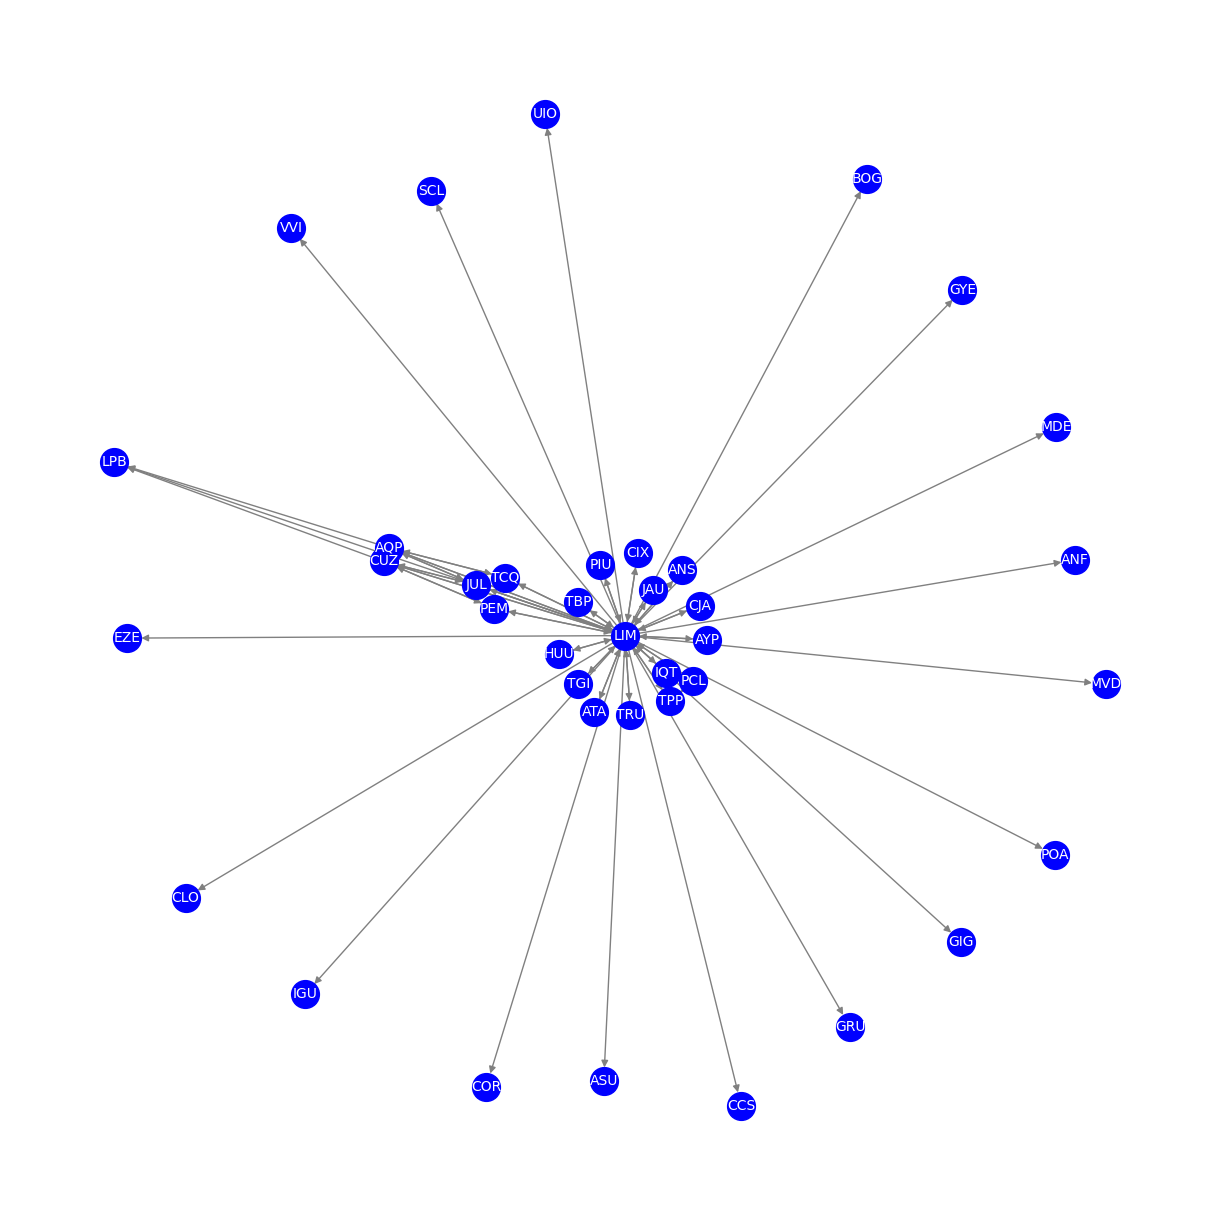

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

# Dibujar el grafo usando spring_layout
pos = nx.spring_layout(G_sa, k=0.4, iterations=100)  # Ajustar los parámetros para mejorar la visualización
nx.draw(G_sa, pos, with_labels=True, node_size=400, font_size=10, font_color='white', node_color='blue', edge_color='gray')

# Mostrar el gráfico
plt.show()

In [47]:
import pandas as pd
import networkx as nx

# Suponiendo que G_sa es tu grafo de interés
airportMeasures = pd.concat([
    pd.DataFrame.from_dict(nx.degree_centrality(G_sa), orient='index', columns=['Degree']),
    pd.DataFrame.from_dict(nx.closeness_centrality(G_sa), orient='index', columns=['Closeness']),
    pd.DataFrame.from_dict(nx.betweenness_centrality(G_sa), orient='index', columns=['Betweenness'])
], axis=1)

# Mostrar las métricas
airportMeasures


,Degree,Closeness,Betweenness
AYP,0.054054,0.263696,0.000000
LIM,1.513514,0.513514,0.495746
CUZ,0.243243,0.286963,0.002127
HUU,0.054054,0.263696,0.000000
PCL,0.162162,0.278764,0.000000
TPP,0.162162,0.278764,0.000000
SCL,0.027027,0.277200,0.000000
AQP,0.243243,0.286963,0.002127
LPB,0.081081,0.292184,0.000000
VVI,0.027027,0.277200,0.000000



El aeropuerto 'LIM' (Lima) se destaca claramente como un centro principal dentro de la red, evidenciado por su alto valor en todas las métricas de centralidad. En términos de centralidad de grado, 'LIM' tiene un valor significativamente más alto (1.513514), lo que indica que está directamente conectado con muchos otros aeropuertos, sugiriendo su papel como un nodo clave. Por otro lado, aeropuertos como 'AYP' y 'HUU' presentan valores bajos (0.054054), lo que indica pocas conexiones directas. En cuanto a la centralidad de cercanía, 'LIM' también muestra un valor elevado (0.513514), lo que sugiere que puede llegar a otros aeropuertos de la red de manera más eficiente a través de un menor número de conexiones. En contraste, aeropuertos como 'AYP' y 'HUU' tienen valores de cercanía más bajos (0.263696), lo que significa que están más alejados en términos de conexiones. Por último, la centralidad de intermediación de 'LIM' es alta (0.495746), destacando su papel crucial como puente en las rutas más cortas entre otros nodos de la red. Aeropuertos como 'AYP', 'HUU' y 'PCL', con valores de intermediación cercanos a cero, no son relevantes como puntos de transferencia. En conclusión, estos datos sugieren que 'LIM' es un hub central para operaciones de tránsito y conexiones internacionales, mientras que otros aeropuertos, como 'AYP' y 'HUU', juegan roles menos importantes en la red.